In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('house_price_dataset.csv')

In [3]:
df.head()

,Area (sqft),Bedrooms,Bathrooms,Floors,Age (years),Location Quality,Price (USD)
0,2185.43,3.0,2.0,2.0,9.0,9.0,330291.42
1,4778.21,NaN,1.0,2.0,6.0,3.0,536659.31
2,3793.97,4.0,2.0,1.0,36.0,2.0,NaN
3,3193.96,3.0,2.0,2.0,31.0,4.0,374959.94
4,1202.08,5.0,3.0,NaN,44.0,5.0,215461.74


In [82]:
df.isnull().sum()

Area (sqft)         0
Bedrooms            0
Bathrooms           0
Floors              0
Age (years)         0
Location Quality    0
Price (USD)         0
dtype: int64

In [5]:
df.shape

(5000, 7)

In [6]:
df['Area (sqft)'].mean()

2730.0518357894734

In [7]:
df['Area (sqft)'].median()

2738.2749999999996

In [8]:
df['Area (sqft)'] = df['Area (sqft)'].fillna(df['Area (sqft)'].median())

In [9]:
df['Bedrooms'].mean()

2.9926315789473685

In [10]:
df['Bedrooms'].median()

3.0

In [11]:
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())

In [12]:
df['Bathrooms'].mean()

1.9974736842105263

In [13]:
df['Bathrooms'].median()

2.0

In [14]:
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())

In [15]:
df['Floors'].mean()

1.5004210526315789

In [16]:
df['Floors'].median()

2.0

In [17]:
df['Floors'] = df['Floors'].fillna(df['Floors'].median())

In [18]:
df['Age (years)'].mean()

24.399789473684212

In [19]:
df['Age (years)'].median()

24.0

In [20]:
df['Age (years)'] = df['Age (years)'].fillna(df['Age (years)'].median())

In [21]:
df['Location Quality'].mean()

5.010947368421053

In [22]:
df['Location Quality'].median()

5.0

In [23]:
df['Location Quality'] = df['Location Quality'].fillna(df['Location Quality'].median())

In [24]:
df['Price (USD)'].mean()

352323.85131368414

In [25]:
df['Price (USD)'].median()

353887.91500000004

In [26]:
df['Price (USD)'] = df['Price (USD)'].fillna(df['Price (USD)'].median())

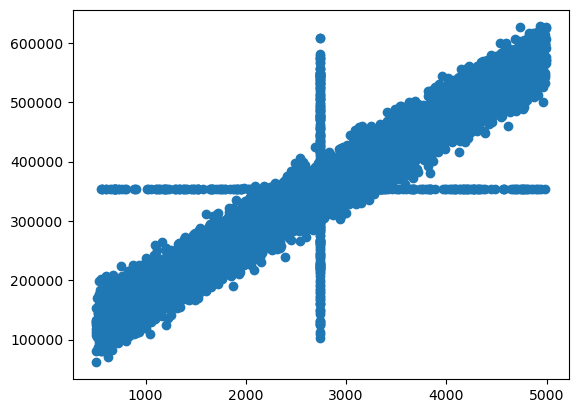

In [27]:
plt.scatter(df['Area (sqft)'], df['Price (USD)'])

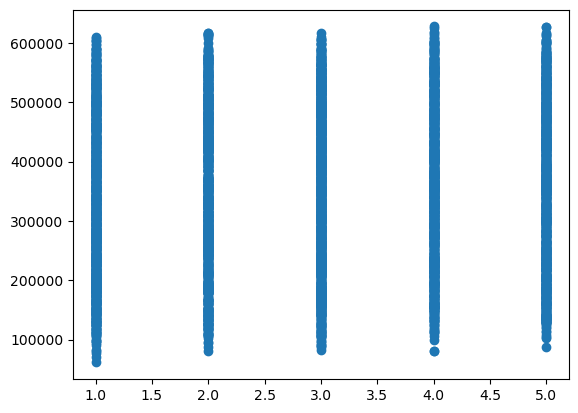

In [28]:
plt.scatter(df['Bedrooms'], df['Price (USD)'])

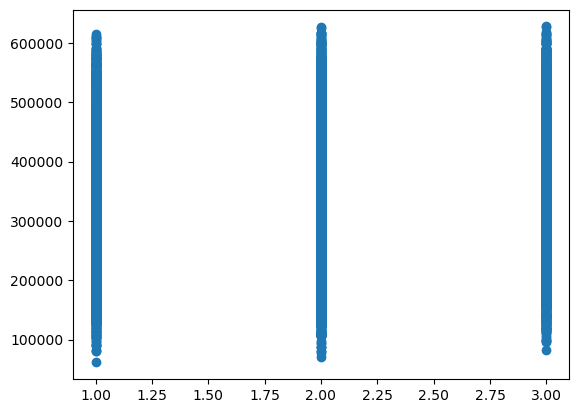

In [29]:
plt.scatter(df['Bathrooms'], df['Price (USD)'])

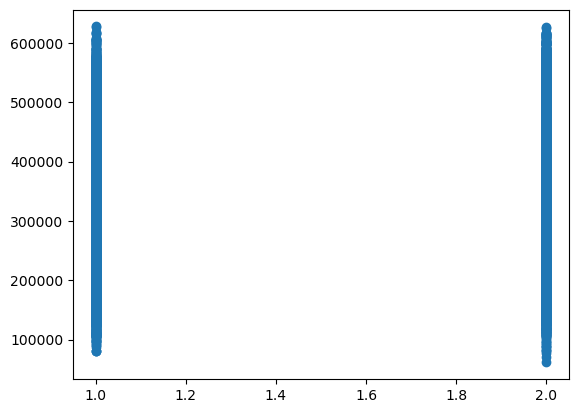

In [30]:
plt.scatter(df['Floors'], df['Price (USD)'])

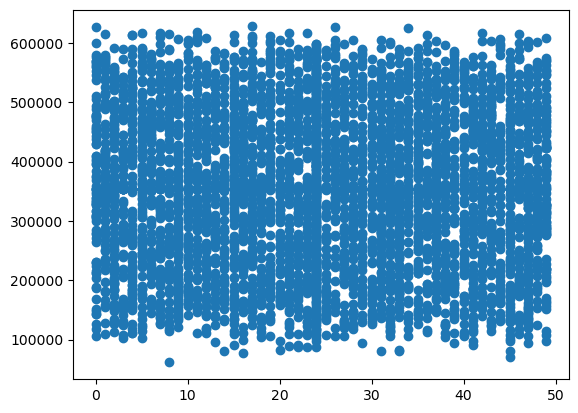

In [31]:
plt.scatter(df['Age (years)'], df['Price (USD)'])

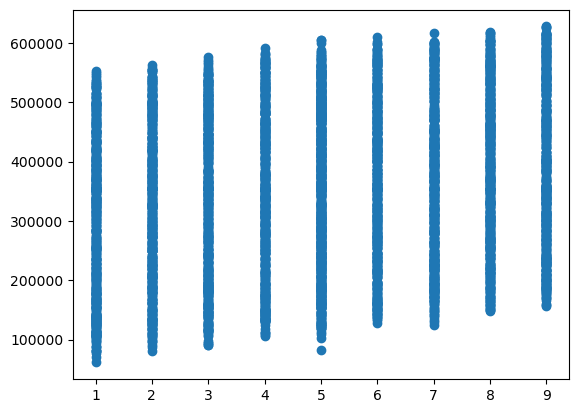

In [32]:
plt.scatter(df['Location Quality'], df['Price (USD)'])

<Axes: >

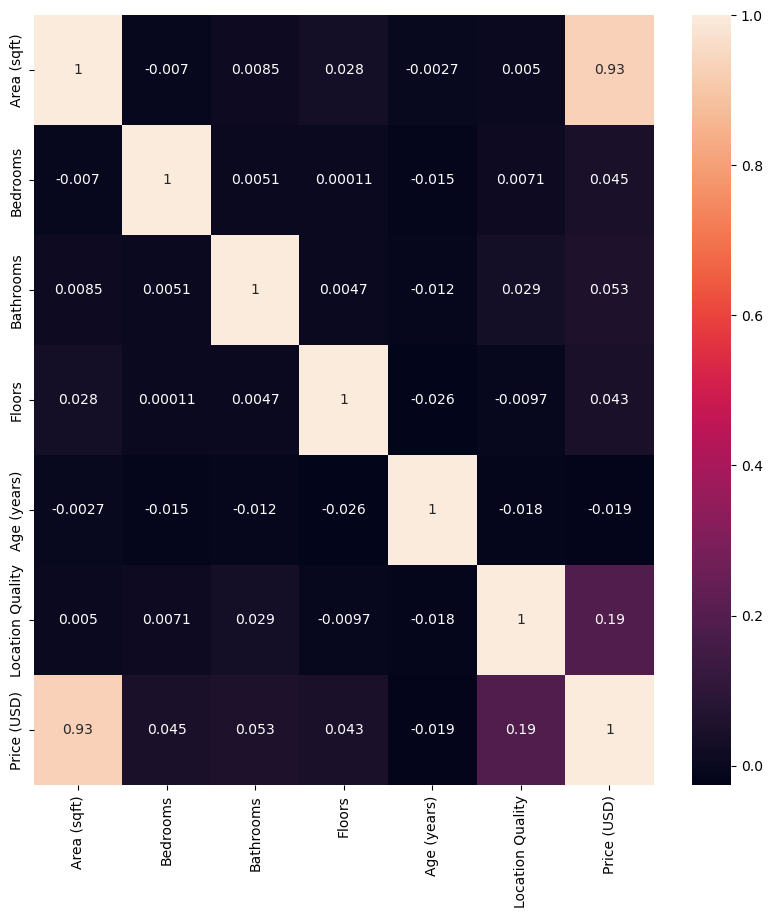

In [94]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

In [33]:
X = df.drop(columns = ['Price (USD)'])

In [34]:
y = df['Price (USD)']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr.coef_

array([  95.11164537, 4769.24971555, 5775.95339459, 5018.08594083,
       -133.34587802, 9598.04309681])

In [38]:
lr.intercept_

14522.803139651485

In [39]:
y_pred_lr = lr.predict(X_test)

In [84]:
lr.score(X_train,y_train)

0.9069524949774129

In [86]:
lr.score(X_test,y_test)

0.883910535923959

In [100]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=10)

In [102]:
ridge_reg.score(X_train,y_train)

0.906952431236342

In [104]:
ridge_reg.score(X_test,y_test)

0.8839092280801686

In [106]:
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=10)

In [108]:
lasso_reg.score(X_train,y_train)

0.9069524589460045

In [110]:
lasso_reg.score(X_test,y_test)

0.8839102165838191

In [114]:
print("Linear Regression.")
print("R2 Score :",r2_score(y_test,y_pred_lr))
print("MSE :",mean_squared_error(y_test,y_pred_lr))

Linear Regression.
R2 Score : 0.883910535923959
MSE : 1953694107.5964763
